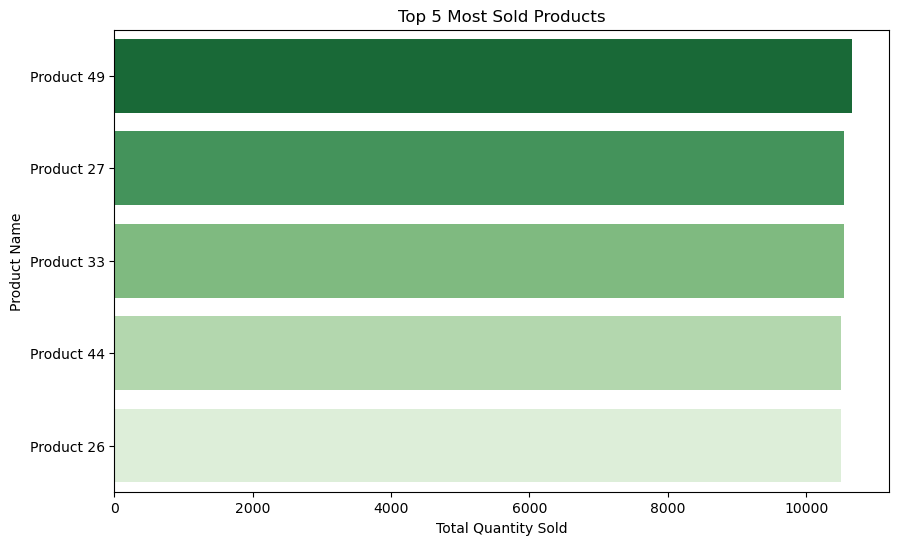

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sales_transactions = pd.read_csv("sales_transactions.csv")
products = pd.read_csv("products.csv")

# Aggregate total quantity sold per product
top_products = sales_transactions.groupby("Product ID")["Quantity Sold"].sum().reset_index()

# Sort by Quantity sold in descending order and select top 5
top_products = top_products.sort_values(by="Quantity Sold", ascending=False).head(5)


# Merge with Products table to get product names
top_products = top_products.merge(products[["Product ID", "Product Name"]], on = "Product ID", how="left")


plt.figure(figsize=(10, 6))
sns.barplot(x="Quantity Sold", y=top_products["Product Name"], data=top_products, hue="Product Name", palette="Greens_r", legend=False)

# Labels and title
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 5 Most Sold Products")
plt.show()

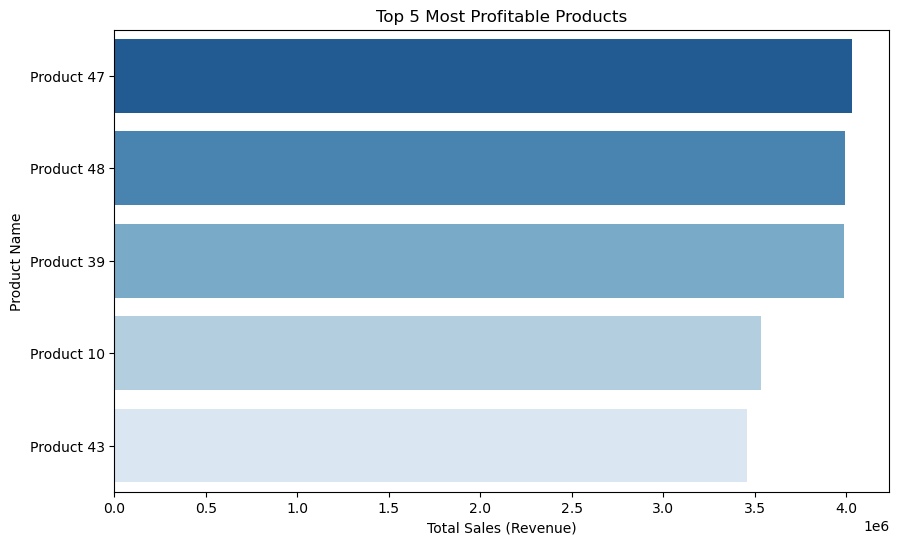

In [2]:
# Aggregate total revenue per product
top_profitable_products = sales_transactions.groupby("Product ID")["Total Sales"].sum().reset_index()

# Sort by Total Sales in descending order and select top 5
top_profitable_products = top_profitable_products.sort_values(by="Total Sales", ascending=False).head(5)

# Merge with the Products table to get Product Names
top_profitable_products = top_profitable_products.merge(products[["Product ID", "Product Name"]], on="Product ID", how="left")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Total Sales", y=top_profitable_products["Product Name"], data=top_profitable_products, hue="Product Name", palette="Blues_r")

plt.xlabel("Total Sales (Revenue)")
plt.ylabel("Product Name")
plt.title("Top 5 Most Profitable Products")
plt.show()

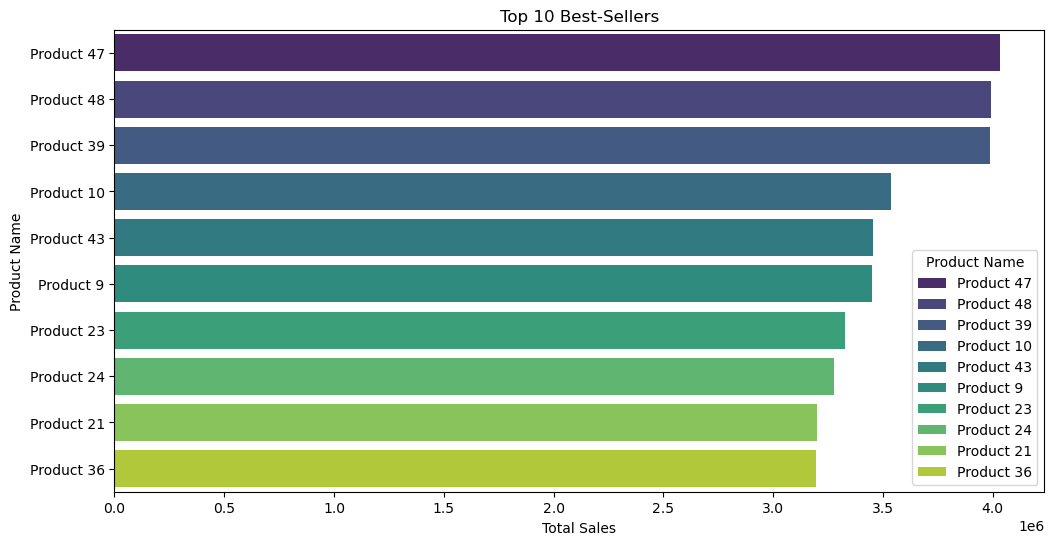

In [26]:
# Merge sales_transactions with products to get Product Name
sales_with_products = sales_transactions.merge(products, on="Product ID", how="left")

# Aggregate total sales per product 
product_sales = sales_with_products.groupby("Product Name")["Total Sales"].sum().reset_index()

# Sorting by total sales in descending order
product_sales = product_sales.sort_values(by="Total Sales", ascending=False)

top_10_products = product_sales.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Total Sales", y="Product Name", data=top_10_products, hue="Product Name", palette="viridis", legend=True)
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Sellers")

plt.show()


In [28]:
sales_transactions

,Transaction ID,Customer ID,Product ID,Employee ID,Region ID,Quantity Sold,Discount,Order Date,Price,Total Sales
0,1,273,25,93,1,9,0.19,2023-01-01 00:00:00,159.53,1162.97
1,2,690,47,11,4,4,0.19,2023-01-01 01:00:00,489.29,1585.30
2,3,368,31,49,5,4,0.24,2023-01-01 02:00:00,290.56,883.30
3,4,989,4,94,4,8,0.16,2023-01-01 03:00:00,152.04,1021.71
4,5,716,50,64,4,1,0.07,2023-01-01 04:00:00,185.38,172.40
...,...,...,...,...,...,...,...,...,...,...
49995,49996,597,9,93,3,9,0.24,2028-09-14 03:00:00,409.39,2800.23
49996,49997,378,6,11,1,3,0.00,2028-09-14 04:00:00,313.80,941.40
49997,49998,12,11,22,5,8,0.19,2028-09-14 05:00:00,223.35,1447.31
49998,49999,968,24,54,5,12,0.24,2028-09-14 06:00:00,398.82,3637.24


In [32]:
products.describe()

,Product ID,Price
count,50.00000,50.000000
mean,25.50000,265.564200
std,14.57738,113.143736
min,1.00000,35.930000
25%,13.25000,178.770000
50%,25.50000,278.160000
75%,37.75000,354.717500
max,50.00000,489.290000
